<a href="https://colab.research.google.com/github/ORCT/ds-section1-project/blob/main/Q3.max_sold_game_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3.출고량이 높은 게임에 대한 분석 및 시각화 프로세스


In [ ]:
from google.colab import files
files.upload();

Saving pre_vgames.csv to pre_vgames.csv


In [ ]:
import pandas as pd

df = pd.read_csv('pre_vgames.csv',index_col=0)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


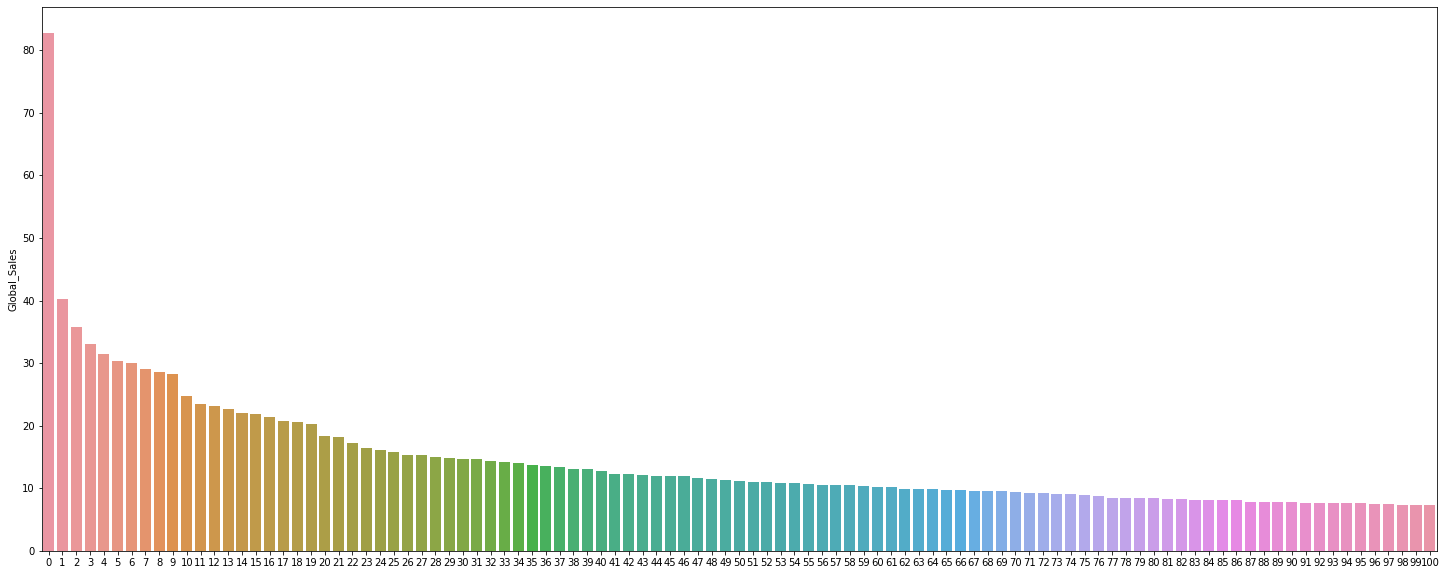

In [ ]:
df_descending = df.sort_values('Global_Sales',ascending=False).reset_index(drop=True).loc[0:100,:]

plt.figure(figsize=(25,10))
sns.barplot(x=df_descending.index,y=df_descending['Global_Sales'])#10번째에서 점프하는 구간이 있고 20번째에서 점프하는 구간이 있으니 편한대로 선택해도 될 것 같다.

In [ ]:
df_top_10 = df.sort_values('Global_Sales',ascending=False).reset_index(drop=True).loc[0:9,:]
df_top_10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


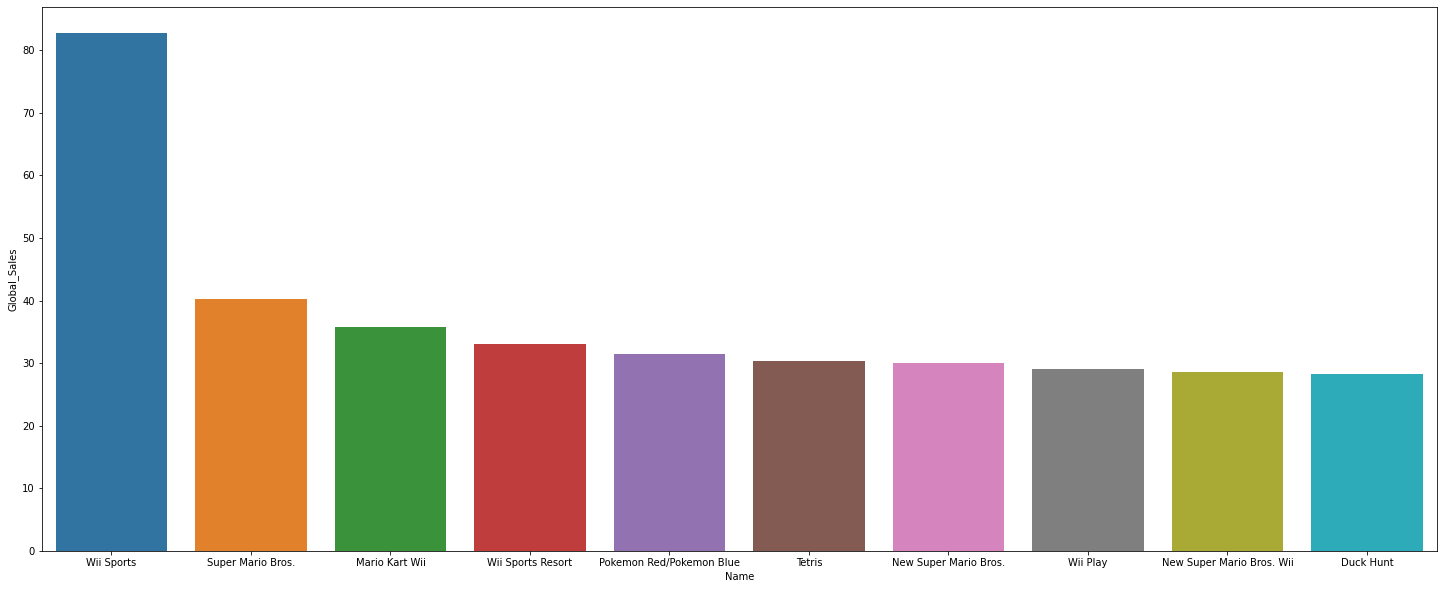

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
sns.barplot(x=df_top_10['Name'],y=df_top_10['Global_Sales'])

10개의 타이틀 모두 닌텐도 사에서 발매한 게임임을 알 수 있다. 그 중에서도 5개는 Wii 플랫폼으로 출시가 되었던 게임으로 Wii의 보급률이 상당했음을 짐작할 수 있다.